We continue with random initial conditions, each component of $p_i$ chosen independently at random from $(-a, a)$. However, we now consider ultra-relativistic particles that move in two dimensions. This means that $p$ is a vector with two components and that $E = |p|$. For the purposes of statistical physics, we still refer to this system as a classical gas, because quantum mechanical effects have been neglected.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

def get_relativistic_energy_2d(p):
    '''
    Calculates energy for an ultra-relativistic particle in 2D.
    E = |p| = sqrt(px^2 + py^2)
    '''
    return np.sqrt(np.sum(p**2))

def simulate_relativistic_gas(N, sweeps, a_param):
    # Initialisation: 2D vectors, Random components in (-a, a)
    momenta = np.random.uniform(-a_param, a_param, size=(N, 2))
    Ed = 0.0

    # Calculate initial total energy of the gas
    initial_total_energy = np.sum([get_relativistic_energy_2d(p) for p in momenta])

    # Heuristic step size
    epsilon = 0.1 * a_param

    total_updates = N * sweeps
    burn_in = int(total_updates * 0.2)

    recorded_Ed = []
    recorded_particle_E = []

    for step in range(total_updates):
        i = np.random.randint(N)
        p_curr = momenta[i]
        E_curr = get_relativistic_energy_2d(p_curr)

        # Propose change in 2D
        delta_p = np.random.uniform(-epsilon, epsilon, size=2)
        p_prop = p_curr + delta_p
        E_prop = get_relativistic_energy_2d(p_prop)

        delta_E = E_prop - E_curr

        if delta_E <= Ed:
            momenta[i] = p_prop
            Ed -= delta_E
            current_E = E_prop
        else:
            current_E = E_curr

        if step > burn_in:
            if step % N == 0:
                recorded_Ed.append(Ed)
                # Record all particle energies periodically
                recorded_particle_E.extend([get_relativistic_energy_2d(p) for p in momenta])

    return np.array(recorded_Ed), np.array(recorded_particle_E), initial_total_energy

Estimated Temperature (T): 0.3694


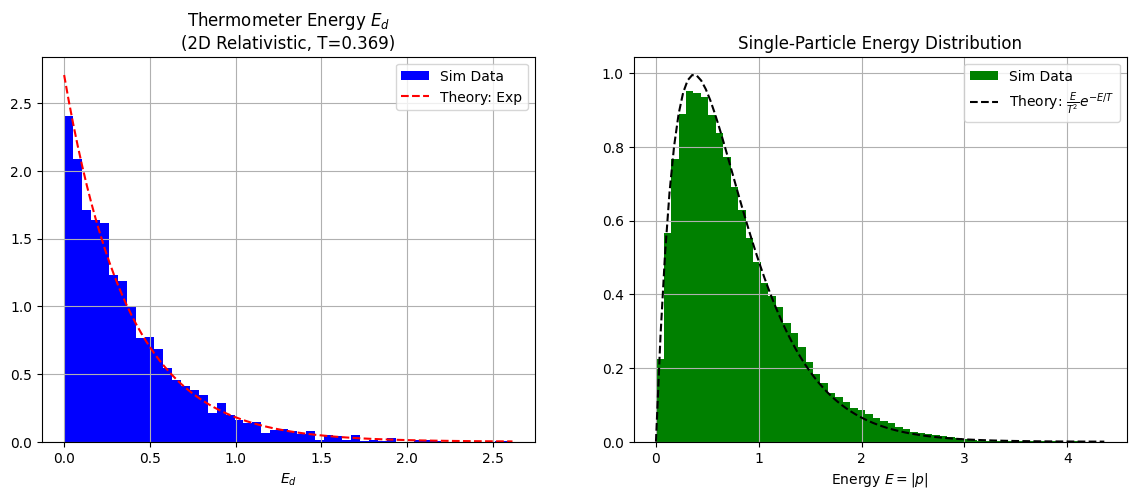

In [4]:
a_fixed = 1.0
Ed_data, Ep_data, E_tot_init = simulate_relativistic_gas(200, 3000, 1.0)
T_est = np.mean(Ed_data)
print(f"Estimated Temperature (T): {T_est:.4f}")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
# Expectation: P(Ed) ~ exp(-Ed/T)
ax1.hist(Ed_data, bins=50, density=True, color='blue', label='Sim Data')
x_ed = np.linspace(0, np.max(Ed_data), 100)
ax1.plot(x_ed, (1/T_est)*np.exp(-x_ed/T_est), 'r--', label='Theory: Exp')
ax1.set_title(f'Thermometer Energy $E_d$\n(2D Relativistic, T={T_est:.3f})')
ax1.set_xlabel('$E_d$')
ax1.legend()
ax1.grid(True)

# Expectation for 2D Relativistic: P(E) ~ E * exp(-E/T)
# Normalisation: Integral(C * E * exp(-E/T)) = 1  => C = 1/T^2
ax2.hist(Ep_data, bins=60, density=True, color='green', label='Sim Data')
x_ep = np.linspace(0, np.max(Ep_data), 100)
# Theoretical PDF
pdf_ep = (x_ep / T_est**2) * np.exp(-x_ep / T_est)
ax2.plot(x_ep, pdf_ep, 'k--', label=r'Theory: $\frac{E}{T^2}e^{-E/T}$')
ax2.set_title('Single-Particle Energy Distribution')
ax2.set_xlabel('Energy $E = |p|$')
ax2.legend()
ax2.grid(True)

plt.show()

a=0.5: E_tot=74.7, T=0.1938
a=1.0: E_tot=149.3, T=0.3706
a=1.5: E_tot=228.6, T=0.5740
a=2.0: E_tot=320.6, T=0.8249
a=3.0: E_tot=465.6, T=1.1800
a=4.0: E_tot=628.8, T=1.5548


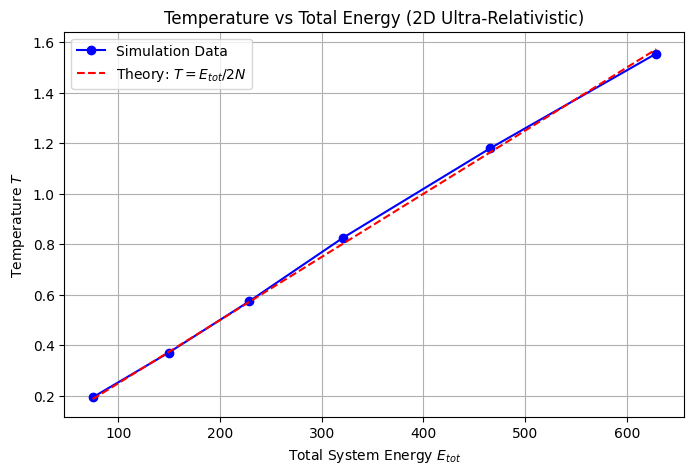

In [5]:
# Temperature vs Total Energy
a_values = [0.5, 1.0, 1.5, 2.0, 3.0, 4.0]
total_energies = []
temperatures = []
for a in a_values:
    Ed_res, _, E_tot_res = simulate_relativistic_gas(200, 2000, a)
    T_res = np.mean(Ed_res)
    total_energies.append(E_tot_res)
    temperatures.append(T_res)
    print(f"a={a}: E_tot={E_tot_res:.1f}, T={T_res:.4f}")

plt.figure(figsize=(8, 5))
plt.plot(total_energies, temperatures, 'bo-', label='Simulation Data')
# Theoretical prediction line
# E_total = N * <E>
# For 2D Relativistic <E> = 2T
# E_total = 2 * N * T  =>  T = E_total / (2N)
E_range = np.linspace(min(total_energies), max(total_energies), 100)
T_theory_line = E_range / (2 * 200)
plt.plot(E_range, T_theory_line, 'r--', label=r'Theory: $T = E_{tot} / 2N$')
plt.xlabel('Total System Energy $E_{tot}$')
plt.ylabel('Temperature $T$')
plt.title('Temperature vs Total Energy (2D Ultra-Relativistic)')
plt.legend()
plt.grid(True)
plt.show()

As with the classical 3D gas, the thermometer energy follows an exponential distribution $\Pr(E_d) \propto e^{-E_d/T}$. This confirms that the algorithm works correctly as a microcanonical thermometer regardless of the underlying mechanics of the gas particles.

For a single particle energy $\Pr(E)$), the histogram follows the curve $\Pr(E) \propto E e^{-E/T}$. In non-relativistic 3D, the density of states $g(E)$ was proportional to $\sqrt{E}$. Here, in 2D momentum space, the area of a shell is $2\pi p dp$. Since $E = p$, the density of states becomes $g(E) \propto E$. This distribution starts at $0$, rises linearly with $E$, and is then cut off by the exponential Boltzmann factor.

There is a linear relationship between the temperature $T$ and the total energy of the system $E_{tot}$ which is described theoretically by
\begin{equation}
    T = \frac{E_{\text{tot}}}{2N}.
\end{equation}

The following is a table comparing the two situations:

| Feature | **3D Non-Relativistic** | **2D Ultra-Relativistic** |
| :--- | :--- | :--- |
| Energy-Momentum | $E = p^2/2m$ | $E = c|p|$ |
| Density of States | $g(E) \propto \sqrt{E}$ | $g(E) \propto E$ |
| Particle Distribution | $\sqrt{E} e^{-E/T}$ | $E e^{-E/T}$ |
| Equipartition Result | $E_{tot} = \frac{3}{2} N k_B T$ | $E_{tot} = 2 N k_B T$ |

The results are fully consistent with the equipartition theorem and the generalised definition of ideal gases in statistical physics. For an ideal gas where the energy relates to momentum as $E \propto p^s$ in $d$ dimensions, the average energy per particle is $\langle E \rangle = \frac{d}{s} k_B T$.

*   Non-Relativistic 3D: $d=3$, $s=2$ (quadratic) so $\langle E \rangle = \frac{3}{2} T$.
*   Ultra-Relativistic 2D: $d=2$, $s=1$ (linear) so $\langle E \rangle = 2T$.

Finally, we consider relativistic particles in three dimensions so that $p$ is a
vector with three components, and
\begin{equation}
    E(p) = \sqrt{1 + |p|^2} - 1.
\end{equation}


In [6]:
def get_general_relativistic_energy(p):
    '''
    Calculates energy for a relativistic particle in 3D.
    E = sqrt(1 + |p|^2) - 1
    '''
    p_sq = np.sum(p**2)
    return np.sqrt(1 + p_sq) - 1

def simulate_general_relativistic(N, sweeps, a_param):
    # Initialisation: 3D vectors, Random components in (-a, a)
    momenta = np.random.uniform(-a_param, a_param, size=(N, 3))
    Ed = 0.0

    # Calculate equilibrium total energy
    current_total_E = np.sum([get_general_relativistic_energy(p) for p in momenta])

    # Scale epsilon
    epsilon = 0.1 * a_param

    total_updates = N * sweeps
    burn_in = int(total_updates * 0.2)

    recorded_Ed = []
    recorded_particle_E = []

    for step in range(total_updates):
        i = np.random.randint(N)
        p_curr = momenta[i]
        E_curr = get_general_relativistic_energy(p_curr)

        delta_p = np.random.uniform(-epsilon, epsilon, size=3)
        p_prop = p_curr + delta_p
        E_prop = get_general_relativistic_energy(p_prop)

        delta_E = E_prop - E_curr

        if delta_E <= Ed:
            momenta[i] = p_prop
            Ed -= delta_E
            # Track total gas energy
            current_total_E += delta_E
            current_E = E_prop
        else:
            current_E = E_curr

        if step > burn_in:
            if step % N == 0:
                recorded_Ed.append(Ed)
                recorded_particle_E.extend([get_general_relativistic_energy(p) for p in momenta])

    # Return average gas energy per particle, average T, and raw particle energies
    # Total energy is conserved, but averaging the tracked value is safer.
    return np.mean(recorded_Ed), np.array(recorded_particle_E)

In [16]:
energy_per_particle = []
temperatures = []
histograms = {}

a_values = [0.1, 0.5, 1.0, 1.5, 2.0, 3.0, 5.0]
for a in a_values:
    T_sim, Ep_data = simulate_general_relativistic(100, 2000, a)
    E_avg_per_particle = np.mean(Ep_data)
    energy_per_particle.append(E_avg_per_particle)
    temperatures.append(T_sim)
    # Save data for the low and high 'a'.
    if a == 0.1 or a == 5.0:
        histograms[a] = (Ep_data, T_sim)

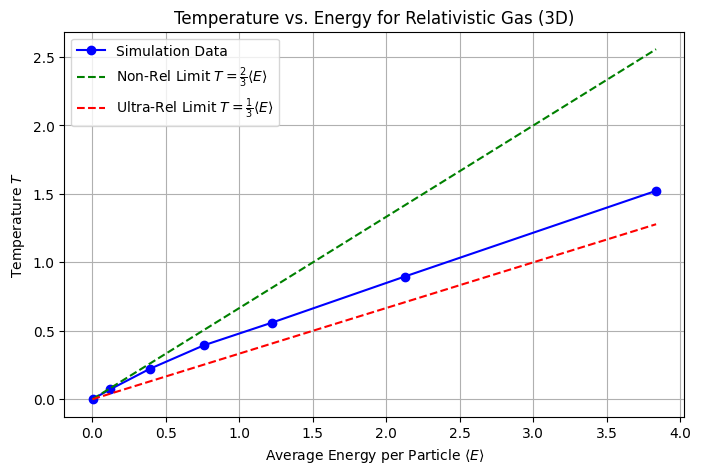

In [18]:
plt.figure(figsize=(8, 5))
plt.plot(energy_per_particle, temperatures, 'bo-', label='Simulation Data')
# Theoretical limit
E_range = np.linspace(0, max(energy_per_particle), 100)
# Limit 1: Non-Relativistic (Small E)
# E = 3/2 N T  => T = (2/3) * (E/N)
plt.plot(E_range, (2/3)*E_range, 'g--', label='Non-Rel Limit $T = \\frac{2}{3}\\langle E \\rangle$')
# Limit 2: Ultra-Relativistic (Large E) in 3D
# E = 3 N T => T = (1/3) * (E/N)
plt.plot(E_range, (1/3)*E_range, 'r--', label='Ultra-Rel Limit $T = \\frac{1}{3}\\langle E \\rangle$')
plt.xlabel('Average Energy per Particle $\\langle E \\rangle$')
plt.ylabel('Temperature $T$')
plt.title('Temperature vs. Energy for Relativistic Gas (3D)')
plt.legend()
plt.grid(True)
plt.show()

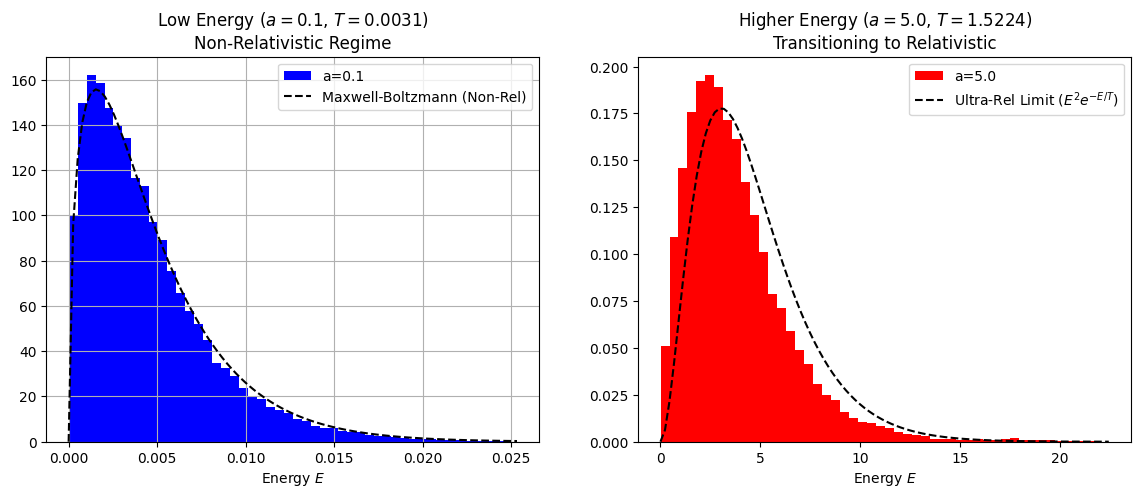

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

a_low = 0.1
data_low, T_low = histograms[a_low]
ax1.hist(data_low, bins=50, density=True, color='blue', label=f'a={a_low}')
x_low = np.linspace(0, np.max(data_low), 100)
# Theoretical Non-Rel: Maxwell Boltzmann ~ sqrt(E) exp(-E/T)
pdf_low = 2 * np.sqrt(x_low/np.pi) * (1/T_low)**(1.5) * np.exp(-x_low / T_low)
ax1.plot(x_low, pdf_low, 'k--', label='Maxwell-Boltzmann (Non-Rel)')
ax1.set_title(f'Low Energy ($a={a_low}$, $T={T_low:.4f}$)\nNon-Relativistic Regime')
ax1.set_xlabel('Energy $E$')
ax1.legend()
ax1.grid(True)

a_high = 5.0
data_high, T_high = histograms[a_high]
ax2.hist(data_high, bins=50, density=True, color='red', label=f'a={a_high}')
x_high = np.linspace(0, np.max(data_high), 100)
# Theoretical Ultra-Rel in 3D: P(E) ~ E^2 exp(-E/T)
# Normalisation C * Integral(E^2 exp(-E/T)) = 1 => C = 1/(2 T^3)
pdf_high = (x_high**2 / (2 * T_high**3)) * np.exp(-x_high / T_high)
ax2.plot(x_high, pdf_high, 'k--', label=r'Ultra-Rel Limit ($E^2 e^{-E/T}$)')
ax2.set_title(f'Higher Energy ($a={a_high}$, $T={T_high:.4f}$)\nTransitioning to Relativistic')
ax2.set_xlabel('Energy $E$')
ax2.legend()
ax1.grid(True)

plt.show()

The plot of temperature vs. average energy per particle shows a curve that transitions between two linear regimes. The behavior is governed by the equipartition theorem for different energy-momentum relationships.

*   For low energy (low $a$);

    When $|p| \ll 1$, the Taylor expansion gives $E \approx \frac{|\mathbf{p}|^2}{2}$. This is the classical kinetic energy. In $3$ dimensions with a quadratic dependence $E \propto p^2$, the equipartition theorem predicts

    \begin{equation}
        \langle E \rangle = \frac{3}{2} T \implies T = \frac{2}{3} \langle E \rangle.
    \end{equation}
    
    The data points for low energy follow the line with slope $2/3$.

*   For high energy (high $a$):

    When $|p| \gg 1$, the function approximates $E \approx |p|$. This is the ultra-relativistic limit. In $3$ dimensions with a linear dependence $E \propto p^1$, the generalised equipartition theorem predicts
    
    \begin{equation}
        \langle E \rangle = \frac{3}{1} T = 3T \implies T = \frac{1}{3} \langle E \rangle.
    \end{equation}
    As energy increases, the data points bend downwards, approaching the line with slope $1/3$.

The simulation captures the crossover from non-relativistic physics (Newtonian) to relativistic physics. The gas has a higher heat capacity at high energies because the energy cost to increase momentum becomes linear rather than quadratic.


*   For low $a$:

    The momentum is small, so $E \approx p^2/2$. The density of states in 3D is $g(E) \propto p^2 \frac{dp}{dE} \propto \sqrt{E}$. The resulting distribution is the Maxwell-Boltzmann distribution,

    \begin{equation}
        \Pr(E) \propto \sqrt{E} e^{-E/T}.
    \end{equation}
    
*   For high $a$:

    The momenta are larger. While not fully ultra-relativistic yet, the system is starting to transition. In the fully ultra-relativistic limit (3D), $E \approx p$. The density of states becomes $g(E) \propto p^2 \frac{dp}{dE} \propto E^2$. The expected distribution would be

    \begin{equation}
        \Pr(E) \propto E^2 e^{-E/T}.
    \end{equation}

    The histogram begins to look like the "Juttner distribution" (generalised relativistic Boltzmann). Comparing the two plots, the peak is shifted further to the right relative to the mean, and the rise from zero is sharper ($E^2$ vs. $\sqrt{E}$), reflecting the larger volume of phase space available at high energies in relativistic 3D systems.